# Analyze speech features to classify PD

## Import Package 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn import metrics

from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error


from sklearn.neural_network import MLPClassifier


%matplotlib inline

## Load and Anayze Data 

### Load Data

In [2]:
biomarker_data = "Data/"

In [3]:
train_data = pd.read_csv(biomarker_data +"pd_trainData.csv",low_memory=False)

test_data = pd.read_csv(biomarker_data +"pd_testData.csv",low_memory=False)

In [4]:
train_data.head()

,lrrkid,gender,educcat_calc,pdenrl,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test_data.head()

,lrrkid,gender,educcat_calc,pdenrl,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,6950001.0,1.0,3.0,0.0,0.0,0.0,61.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6950001.0,1.0,3.0,0.0,0.0,0.0,61.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6950001.0,1.0,3.0,0.0,0.0,0.0,61.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6950001.0,1.0,3.0,0.0,0.0,0.0,61.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6950001.0,1.0,3.0,0.0,0.0,0.0,61.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#check duplicate patient on train and test
train_data['lrrkid'].isin(test_data['lrrkid']).value_counts()

False    8342
Name: lrrkid, dtype: int64

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519 entries, 0 to 3518
Columns: 4379 entries, lrrkid to CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed
dtypes: float64(4379)
memory usage: 117.6 MB


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8342 entries, 0 to 8341
Columns: 4379 entries, lrrkid to CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed
dtypes: float64(4379)
memory usage: 278.7 MB


In [9]:
train_data.head(10)

,lrrkid,gender,educcat_calc,pdenrl,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,660003.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,660003.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
test_data['lrrkid'].nunique()

289

In [11]:
train_data['lrrkid'].nunique()

675

In [12]:
train_data["pdenrl"].value_counts()

1.0    4294
0.0    4048
Name: pdenrl, dtype: int64

In [13]:
test_data["pdenrl"].value_counts()

0.0    1921
1.0    1598
Name: pdenrl, dtype: int64

# Target variable y and independent variables x

In [14]:

trainX = train_data.drop(['lrrkid','pdenrl'], axis=1)

trainy = train_data['pdenrl']

trainy[0:5]

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: pdenrl, dtype: float64

In [15]:
trainX.head()

,gender,educcat_calc,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,moca_ageassess,updrs1,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,2.0,6.0,42.0,40.0,72.0,30.0,0.0,25.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,6.0,42.0,40.0,72.0,30.0,0.0,25.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,6.0,42.0,40.0,72.0,30.0,0.0,25.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,6.0,42.0,40.0,72.0,30.0,0.0,25.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,6.0,42.0,40.0,72.0,30.0,0.0,25.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
testX = test_data.drop(['lrrkid','pdenrl'], axis=1)

testY = test_data['pdenrl']

testY[0:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pdenrl, dtype: float64

In [17]:
testX.head()

,gender,educcat_calc,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,moca_ageassess,updrs1,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,1.0,3.0,0.0,0.0,61.0,0.0,0.0,29.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,0.0,0.0,61.0,0.0,0.0,29.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,0.0,0.0,61.0,0.0,0.0,29.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.0,0.0,0.0,61.0,0.0,0.0,29.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,0.0,0.0,61.0,0.0,0.0,29.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
print("Shape of Xtest: %d   %d" % (testX.shape))
print("Shape of yest:  %d" % (testY.shape))

print("Shape of trainx: %d   %d" % (trainX.shape))
print("Shape of trainY:  %d" % (trainy.shape))

Shape of Xtest: 3519   4377
Shape of yest:  3519
Shape of trainx: 8342   4377
Shape of trainY:  8342


#Performing over-sampling of the data, since the classes are imbalanced

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
trainX, trainy = sm.fit_resample(trainX, trainy)

print("Shape of trainx: %d   %d" % (trainX.shape))
print("Shape of trainY:  %d" % (trainy.shape))

In [19]:
from sklearn.preprocessing import MaxAbsScaler
#mc = MaxAbsScaler()
#trainX = mc.fit_transform(trainX)
#testX = mc.transform(testX)



from sklearn.preprocessing import StandardScaler
import time

sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

## Support Vector Machine

In [20]:
#Support Vector Classifier 
from sklearn.svm import SVC 
import time


#svm_clf = LinearSVC(penalty="l1", dual=False)

svm_clf = SVC(kernel='linear')

#start = time.time() 
# fitting x samples and y classes 
svm_clf.fit(trainX,trainy)

#stop = time.time()
#print(f"Training time: {stop - start}s") 

SVC(kernel='linear')

In [21]:
svm_score = svm_clf.score(trainX, trainy)
print("Train Score: ", svm_score)

Train Score:  0.9696715415967394


In [22]:
cv_scores = cross_val_score(svm_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.94


In [23]:
ypred = svm_clf.predict(testX)

cm = confusion_matrix(testY, ypred)
print(cm)

[[1767  154]
 [  77 1521]]


In [24]:
SVM_accuracy_score = accuracy_score(testY,svm_clf.predict(testX))*100
print("SVM test accuracy_score:", SVM_accuracy_score)

SVM test accuracy_score: 93.43563512361467


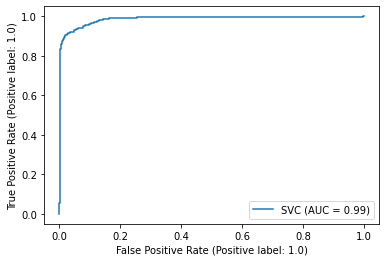

In [25]:
RocCurveDisplay.from_estimator(svm_clf,testX,testY)

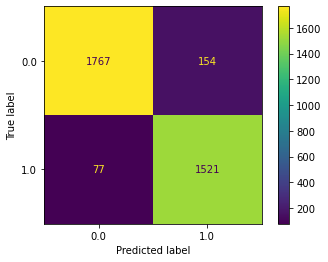

In [26]:
#confusion_matrix(y_test,yhat_svm)

ConfusionMatrixDisplay.from_estimator(svm_clf, testX, testY)  
plt.show() 

In [27]:
print("confusion matrix\n",confusion_matrix(testY,ypred))
print("\nclassification report\n",classification_report(testY,ypred))
print("Accuracy: ",accuracy_score(testY,ypred)*100)

confusion matrix
 [[1767  154]
 [  77 1521]]

classification report
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      1921
         1.0       0.91      0.95      0.93      1598

    accuracy                           0.93      3519
   macro avg       0.93      0.94      0.93      3519
weighted avg       0.94      0.93      0.93      3519

Accuracy:  93.43563512361467


In [28]:
#CALCULATE THE COEFFICIENT OF DETERMINATION ON TEST DATA
y_pred_test=svm_clf.predict(testX)
msqe_test=mean_squared_error(testY, y_pred_test)  
var_test=np.var(testY) 
score_test=1-msqe_test/var_test

print('\n')
print('Coefficient of determination of test data:')
print(score_test)




Coefficient of determination of test data:
0.7351944355222979


In [29]:
#CALCULATE THE COEFFICIENT OF DETERMINATION ON TRAIN DATA
y_pred_train=svm_clf.predict(trainX)
msqe_train=mean_squared_error(trainy, y_pred_train) 
var_train=np.var(trainy)
score_train=1-msqe_train/var_train

print('\n')
print('Coefficient of determination of train data:')
print(score_train)



Coefficient of determination of train data:
0.8785805775500829


## LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)

In [31]:
start = time.time() 
# fitting x samples and y classes 
lr_clf.fit(trainX,trainy)
stop = time.time()
print(f"Training time: {stop - start}s") 

Training time: 6.539121150970459s


In [32]:
lr_score = lr_clf.score(trainX, trainy)
print("Train Score: ", lr_score)

Train Score:  0.9677535363222249


In [33]:
lr_cv_scores = cross_val_score(lr_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % lr_cv_scores.mean())

CV average score: 0.94


In [34]:
lr_ypred = lr_clf.predict(testX)

cm = confusion_matrix(testY, lr_ypred)
print(cm)

[[1813  108]
 [  72 1526]]


In [35]:
lr_accuracy_score = accuracy_score(testY,lr_clf.predict(testX))*100
print("LR test accuracy_score:", lr_accuracy_score)

LR test accuracy_score: 94.8849104859335


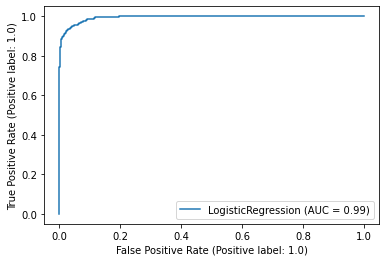

In [36]:
RocCurveDisplay.from_estimator(lr_clf,testX,testY)

In [37]:
print(lr_clf.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


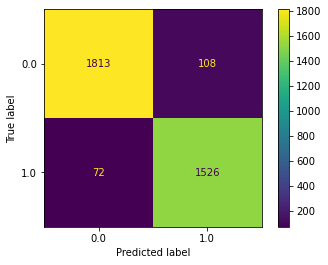

In [38]:
#confusion_matrix(y_test,yhat_svm)

ConfusionMatrixDisplay.from_estimator(lr_clf, testX, testY)  
plt.show() 

In [39]:
print("confusion matrix\n",confusion_matrix(testY,lr_ypred))
print("\nclassification report\n",classification_report(testY,lr_ypred))
print("Accuracy: ",accuracy_score(testY,lr_ypred)*100)

confusion matrix
 [[1813  108]
 [  72 1526]]

classification report
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1921
         1.0       0.93      0.95      0.94      1598

    accuracy                           0.95      3519
   macro avg       0.95      0.95      0.95      3519
weighted avg       0.95      0.95      0.95      3519

Accuracy:  94.8849104859335


In [40]:
#CALCULATE THE COEFFICIENT OF DETERMINATION ON TEST DATA
y_pred_test=lr_clf.predict(testX)
msqe_test=mean_squared_error(testY, y_pred_test)  
var_test=np.var(testY) 
score_test=1-msqe_test/var_test

print('\n')
print('Coefficient of determination of test data:')
print(score_test)




Coefficient of determination of test data:
0.7936580017056867


In [41]:
#CALCULATE THE COEFFICIENT OF DETERMINATION ON TRAIN DATA
y_pred_train=lr_clf.predict(trainX)
msqe_train=mean_squared_error(trainy, y_pred_train) 
var_train=np.var(trainy)
score_train=1-msqe_train/var_train

print('\n')
print('Coefficient of determination of train data:')
print(score_train)



Coefficient of determination of train data:
0.8709018788971237


## KNeighborsClassifier (KNN)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

Knn_clf = KNeighborsClassifier()


In [43]:
start = time.time() 
# fitting x samples and y classes 
Knn_clf.fit(trainX,trainy)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.3448460102081299s


In [44]:
Knn_score = Knn_clf.score(trainX, trainy)
print("Train Score: ", Knn_score)

Train Score:  0.8816830496283865


In [45]:
knn_cv_scores = cross_val_score(Knn_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % knn_cv_scores.mean())


CV average score: 0.66


In [46]:
knn_ypred = Knn_clf.predict(testX)

cm = confusion_matrix(testY, knn_ypred)
print(cm)

[[1546  375]
 [ 337 1261]]


In [47]:
knn_accuracy_score = accuracy_score(testY,Knn_clf.predict(testX))*100
print("KNN test accuracy_score:", knn_accuracy_score)

KNN test accuracy_score: 79.7669792554703


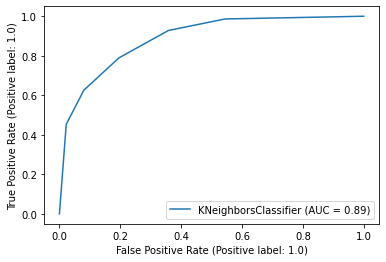

In [48]:
RocCurveDisplay.from_estimator(Knn_clf,testX,testY)

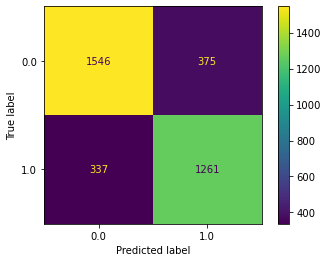

In [49]:

#confusion_matrix(y_test,yhat_svm)


ConfusionMatrixDisplay.from_estimator(Knn_clf, testX, testY)  
plt.show() 

In [50]:
print("confusion matrix\n",confusion_matrix(testY,knn_ypred))
print("\nclassification report\n",classification_report(testY,knn_ypred))
print("Accuracy: ",accuracy_score(testY,knn_ypred)*100)

confusion matrix
 [[1546  375]
 [ 337 1261]]

classification report
               precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      1921
         1.0       0.77      0.79      0.78      1598

    accuracy                           0.80      3519
   macro avg       0.80      0.80      0.80      3519
weighted avg       0.80      0.80      0.80      3519

Accuracy:  79.7669792554703


## Decision Trees

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation

In [51]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier()

#dt_clf = dt_clf.fit(trainX,trainy)

In [52]:
start = time.time() 

dt_clf = dt_clf.fit(trainX,trainy)

stop = time.time()
print(f"Training time: {stop - start}s") 

Training time: 0.6405103206634521s


In [53]:
dt_score = dt_clf.score(trainX, trainy)
print("Train Score: ", dt_score)

Train Score:  1.0


In [54]:
dt_cv_scores = cross_val_score(dt_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % dt_cv_scores.mean())

CV average score: 0.94


In [55]:
dt_ypred = dt_clf.predict(testX)

dtcm = confusion_matrix(testY, dt_ypred)
print(dtcm)

[[1792  129]
 [  89 1509]]


In [56]:
dt_accuracy_score = accuracy_score(testY,dt_clf.predict(testX))*100
print("DT test accuracy_score:", dt_accuracy_score)

DT test accuracy_score: 93.80505825518614


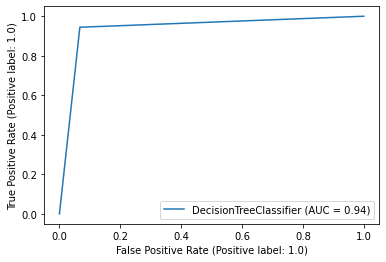

In [57]:
RocCurveDisplay.from_estimator(dt_clf,testX,testY)

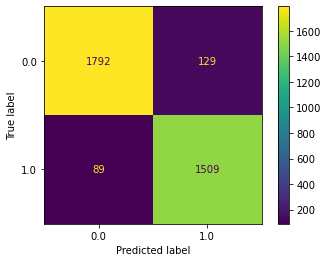

In [58]:
ConfusionMatrixDisplay.from_estimator(dt_clf, testX, testY)  
plt.show() 

In [59]:
print("confusion matrix\n",confusion_matrix(testY,dt_ypred))
print("\nclassification report\n",classification_report(testY,dt_ypred))
print("Accuracy: ",accuracy_score(testY,dt_ypred)*100)

confusion matrix
 [[1792  129]
 [  89 1509]]

classification report
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1921
         1.0       0.92      0.94      0.93      1598

    accuracy                           0.94      3519
   macro avg       0.94      0.94      0.94      3519
weighted avg       0.94      0.94      0.94      3519

Accuracy:  93.80505825518614


[Text(0.5641296012269938, 0.9833333333333333, 'x[2] <= -0.386\ngini = 0.5\nsamples = 8342\nvalue = [4048, 4294]'),
 Text(0.5518596625766872, 0.95, 'x[4] <= -1.443\ngini = 0.28\nsamples = 4867\nvalue = [4048, 819]'),
 Text(0.5273197852760736, 0.9166666666666666, 'x[29] <= 0.437\ngini = 0.5\nsamples = 1563\nvalue = [777, 786]'),
 Text(0.5150498466257669, 0.8833333333333333, 'x[3] <= -0.128\ngini = 0.487\nsamples = 1353\nvalue = [567, 786]'),
 Text(0.5027799079754601, 0.85, 'x[7] <= -0.406\ngini = 0.498\nsamples = 1214\nvalue = [567, 647]'),
 Text(0.21625766871165644, 0.8166666666666667, 'x[7] <= -2.33\ngini = 0.406\nsamples = 339\nvalue = [96, 243]'),
 Text(0.20398773006134968, 0.7833333333333333, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.2285276073619632, 0.7833333333333333, 'x[7] <= -1.78\ngini = 0.448\nsamples = 283\nvalue = [96, 187]'),
 Text(0.17177914110429449, 0.75, 'x[0] <= -0.103\ngini = 0.278\nsamples = 48\nvalue = [40, 8]'),
 Text(0.15950920245398773, 0.71666666666

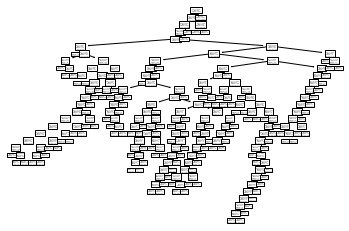

In [60]:
tree.plot_tree(dt_clf)

In [61]:
#CALCULATE THE COEFFICIENT OF DETERMINATION ON TEST DATA
y_pred_test=dt_clf.predict(testX)
msqe_test=mean_squared_error(testY, y_pred_test)  
var_test=np.var(testY) 
score_test=1-msqe_test/var_test

print('\n')
print('Coefficient of determination of test data:')
print(score_test)




Coefficient of determination of test data:
0.7500969131768871


In [62]:
#CALCULATE THE COEFFICIENT OF DETERMINATION ON TRAIN DATA
y_pred_train=dt_clf.predict(trainX)
msqe_train=mean_squared_error(trainy, y_pred_train) 
var_train=np.var(trainy)
score_train=1-msqe_train/var_train

print('\n')
print('Coefficient of determination of train data:')
print(score_train)



Coefficient of determination of train data:
1.0


## RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [64]:
start = time.time() 

rf_clf = rf_clf.fit(trainX,trainy)

stop = time.time()
print(f"Training time: {stop - start}s") 

Training time: 9.57614016532898s


In [65]:
rf_score = rf_clf.score(trainX, trainy)
print("Train Score: ", rf_score)

Train Score:  1.0


In [66]:
rf_cv_scores = cross_val_score(rf_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % rf_cv_scores.mean())

CV average score: 0.87


In [67]:
rf_ypred = rf_clf.predict(testX)

rfcm = confusion_matrix(testY, rf_ypred)
print(rfcm)

[[1822   99]
 [  81 1517]]


In [68]:
rf_accuracy_score = accuracy_score(testY,rf_clf.predict(testX))*100
print("DT test accuracy_score:", rf_accuracy_score)

DT test accuracy_score: 94.8849104859335


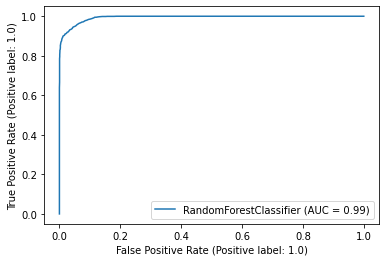

In [69]:
RocCurveDisplay.from_estimator(rf_clf,testX,testY)

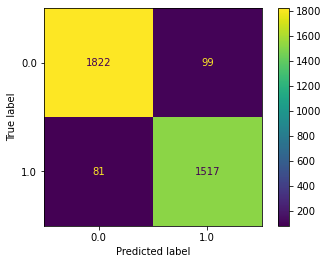

In [70]:
ConfusionMatrixDisplay.from_estimator(rf_clf, testX, testY)  
plt.show() 

In [71]:
print("confusion matrix\n",confusion_matrix(testY,rf_ypred))
print("\nclassification report\n",classification_report(testY,rf_ypred))
print("Accuracy: ",accuracy_score(testY,rf_ypred)*100)

confusion matrix
 [[1822   99]
 [  81 1517]]

classification report
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1921
         1.0       0.94      0.95      0.94      1598

    accuracy                           0.95      3519
   macro avg       0.95      0.95      0.95      3519
weighted avg       0.95      0.95      0.95      3519

Accuracy:  94.8849104859335


## AdaBoostClassifier

In [72]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)


In [73]:
ada_clf.fit(trainX,trainy)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [74]:
ada_score = ada_clf.score(trainX, trainy)
print("Train Score: ", ada_score)

Train Score:  0.9780628146727404


In [75]:
ada_cv_scores = cross_val_score(ada_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % ada_cv_scores.mean())

CV average score: 0.92


In [76]:
ada_ypred = ada_clf.predict(testX)

adacm = confusion_matrix(testY, ada_ypred)
print(adacm)

[[1767  154]
 [  90 1508]]


In [77]:
ada_accuracy_score = accuracy_score(testY,ada_clf.predict(testX))*100
print("ADABoosting test accuracy_score:", ada_accuracy_score)

ADABoosting test accuracy_score: 93.0662119920432


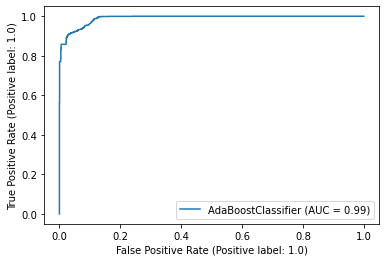

In [78]:
RocCurveDisplay.from_estimator(ada_clf,testX,testY)

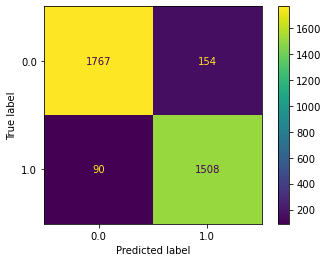

In [79]:
ConfusionMatrixDisplay.from_estimator(ada_clf, testX, testY)  
plt.show() 

In [80]:
print("confusion matrix\n",confusion_matrix(testY,ada_ypred))
print("\nclassification report\n",classification_report(testY,ada_ypred))
print("Accuracy: ",accuracy_score(testY,ada_ypred)*100)

confusion matrix
 [[1767  154]
 [  90 1508]]

classification report
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      1921
         1.0       0.91      0.94      0.93      1598

    accuracy                           0.93      3519
   macro avg       0.93      0.93      0.93      3519
weighted avg       0.93      0.93      0.93      3519

Accuracy:  93.0662119920432


## GradientBoostingClassifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier 

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)

In [82]:
gb_clf.fit(trainX, trainy)

GradientBoostingClassifier(learning_rate=1.0, max_depth=5, random_state=0)

In [83]:
gb_score = gb_clf.score(trainX, trainy)
print("Train Score: ", gb_score)

Train Score:  1.0


In [84]:
gb_cv_scores = cross_val_score(gb_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % gb_cv_scores.mean())

CV average score: 0.94


In [85]:
gb_ypred = gb_clf.predict(testX)

gbcm = confusion_matrix(testY, gb_ypred)
print(gbcm)

[[1798  123]
 [  74 1524]]


In [86]:
gb_accuracy_score = accuracy_score(testY,gb_clf.predict(testX))*100
print("GBBoosting test accuracy_score:", gb_accuracy_score)

GBBoosting test accuracy_score: 94.40181869849388


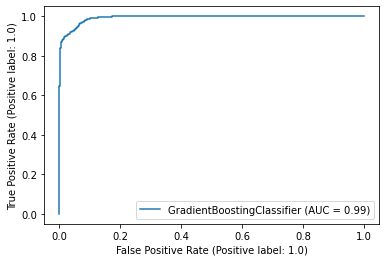

In [87]:
RocCurveDisplay.from_estimator(gb_clf,testX,testY)

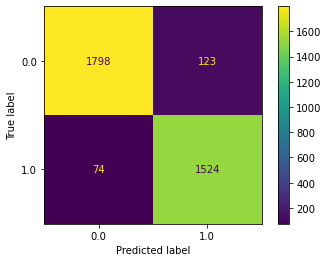

In [88]:
ConfusionMatrixDisplay.from_estimator(gb_clf, testX, testY)  
plt.show() 

In [89]:
print("confusion matrix\n",confusion_matrix(testY,gb_ypred))
print("\nclassification report\n",classification_report(testY,gb_ypred))
print("Accuracy: ",accuracy_score(testY,gb_ypred)*100)

confusion matrix
 [[1798  123]
 [  74 1524]]

classification report
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1921
         1.0       0.93      0.95      0.94      1598

    accuracy                           0.94      3519
   macro avg       0.94      0.94      0.94      3519
weighted avg       0.94      0.94      0.94      3519

Accuracy:  94.40181869849388


# TRAINING AND TESTING THE NEURAL NETWORK

## Multi-layer Perceptron classifier (MLP classifier)

In [90]:

#tuple representing number of neurons in intermediate layers
nhiddentple=(256,128,64,32)

#   XX is the regularization parameter
XX = 1.e-4

# seed for random number generator
iseed = 1234

#the number of layers is set with hidden_layer_sizes
#create the multilayer perceptron object
MLP_clf = MLPClassifier(hidden_layer_sizes=nhiddentple,activation='relu', solver='adam', early_stopping=True,
random_state=iseed, batch_size=64, max_iter=2000, validation_fraction=0.1, tol=1.e-6, verbose=True)



In [91]:
# train the model
MLP_clf.fit(trainX, trainy) 

Iteration 1, loss = 0.43965792
Validation score: 0.894611
Iteration 2, loss = 0.23696982
Validation score: 0.892216
Iteration 3, loss = 0.18273758
Validation score: 0.893413
Iteration 4, loss = 0.16378974
Validation score: 0.904192
Iteration 5, loss = 0.14781180
Validation score: 0.918563
Iteration 6, loss = 0.13990238
Validation score: 0.917365
Iteration 7, loss = 0.13229145
Validation score: 0.900599
Iteration 8, loss = 0.14362790
Validation score: 0.907784
Iteration 9, loss = 0.13691687
Validation score: 0.919760
Iteration 10, loss = 0.12748601
Validation score: 0.917365
Iteration 11, loss = 0.11297789
Validation score: 0.916168
Iteration 12, loss = 0.11615020
Validation score: 0.924551
Iteration 13, loss = 0.10672305
Validation score: 0.922156
Iteration 14, loss = 0.11151035
Validation score: 0.928144
Iteration 15, loss = 0.10219538
Validation score: 0.919760
Iteration 16, loss = 0.10756302
Validation score: 0.922156
Iteration 17, loss = 0.09888936
Validation score: 0.926946
Iterat

MLPClassifier(batch_size=64, early_stopping=True,
              hidden_layer_sizes=(256, 128, 64, 32), max_iter=2000,
              random_state=1234, tol=1e-06, verbose=True)

In [92]:
ypred = MLP_clf.predict(trainX)


In [93]:
accuracy_score(trainy, MLP_clf.predict(trainX))

0.9621193958283385

In [94]:
mlp_cv_scores = cross_val_score(MLP_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % mlp_cv_scores.mean())

Iteration 1, loss = 0.39592746
Validation score: 0.910786
Iteration 2, loss = 0.17675758
Validation score: 0.937417
Iteration 3, loss = 0.13598778
Validation score: 0.930759
Iteration 4, loss = 0.11862481
Validation score: 0.932091
Iteration 5, loss = 0.11428744
Validation score: 0.934754
Iteration 6, loss = 0.09749911
Validation score: 0.937417
Iteration 7, loss = 0.09454953
Validation score: 0.924101
Iteration 8, loss = 0.08473944
Validation score: 0.940080
Iteration 9, loss = 0.08138890
Validation score: 0.938748
Iteration 10, loss = 0.08231483
Validation score: 0.950732
Iteration 11, loss = 0.07962083
Validation score: 0.952064
Iteration 12, loss = 0.07015718
Validation score: 0.945406
Iteration 13, loss = 0.07081466
Validation score: 0.953395
Iteration 14, loss = 0.06887859
Validation score: 0.962716
Iteration 15, loss = 0.07314365
Validation score: 0.953395
Iteration 16, loss = 0.06463627
Validation score: 0.941411
Iteration 17, loss = 0.07152861
Validation score: 0.946738
Iterat

Iteration 20, loss = 0.10156689
Validation score: 0.909454
Iteration 21, loss = 0.09563941
Validation score: 0.910786
Iteration 22, loss = 0.09421450
Validation score: 0.925433
Iteration 23, loss = 0.10087945
Validation score: 0.901465
Iteration 24, loss = 0.09342269
Validation score: 0.916112
Iteration 25, loss = 0.10014901
Validation score: 0.909454
Iteration 26, loss = 0.10692356
Validation score: 0.913449
Iteration 27, loss = 0.09532571
Validation score: 0.908123
Iteration 28, loss = 0.09703528
Validation score: 0.913449
Validation score did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.42961796
Validation score: 0.877497
Iteration 2, loss = 0.22456874
Validation score: 0.882823
Iteration 3, loss = 0.21734323
Validation score: 0.885486
Iteration 4, loss = 0.17969139
Validation score: 0.878828
Iteration 5, loss = 0.15049441
Validation score: 0.881491
Iteration 6, loss = 0.14046762
Validation score: 0.886818
Iteration 7, loss = 0.154807

Iteration 48, loss = 0.07998033
Validation score: 0.910786
Iteration 49, loss = 0.07900334
Validation score: 0.925433
Iteration 50, loss = 0.08104063
Validation score: 0.922770
Iteration 51, loss = 0.07797746
Validation score: 0.920107
Iteration 52, loss = 0.08360421
Validation score: 0.921438
Iteration 53, loss = 0.08036767
Validation score: 0.926764
Iteration 54, loss = 0.07527796
Validation score: 0.929427
Iteration 55, loss = 0.07729256
Validation score: 0.921438
Validation score did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.36293035
Validation score: 0.872170
Iteration 2, loss = 0.19281113
Validation score: 0.890812
Iteration 3, loss = 0.16416106
Validation score: 0.877497
Iteration 4, loss = 0.15398930
Validation score: 0.882823
Iteration 5, loss = 0.13869742
Validation score: 0.894807
Iteration 6, loss = 0.13201761
Validation score: 0.898802
Iteration 7, loss = 0.12634895
Validation score: 0.902796
Iteration 8, loss = 0.1242398

In [95]:
MLP_clf.predict_proba(testX[:2])

array([[9.73037327e-01, 2.69626729e-02],
       [9.99999649e-01, 3.51264121e-07]])

In [96]:
yhat_mlp = MLP_clf.predict(testX)


In [97]:
mlp_test_accuracy_score = accuracy_score(testY,MLP_clf.predict(testX))*100
print("MLP test accuracy_score:", mlp_test_accuracy_score)

MLP test accuracy_score: 92.8388746803069


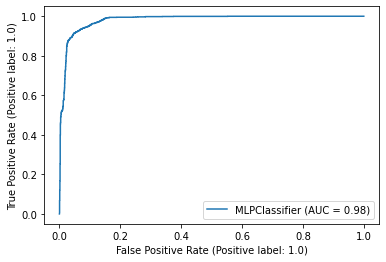

In [98]:
RocCurveDisplay.from_estimator(MLP_clf,testX,testY)

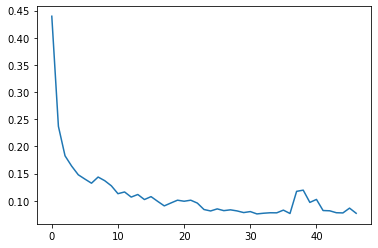

In [99]:
plt.plot(MLP_clf.loss_curve_,label='Loss')
#plt.plot(MLP_clf.validation_scores_,label='validation')

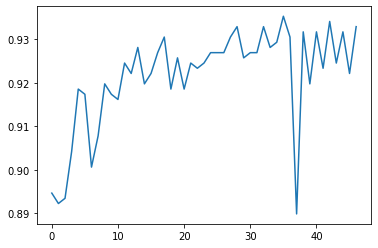

In [100]:
plt.plot(MLP_clf.validation_scores_,label='validation')

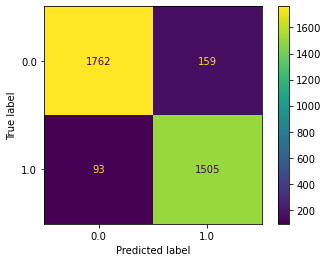

In [101]:
#confusion_matrix(y_test,yhat_svm)

ConfusionMatrixDisplay.from_estimator(MLP_clf, testX, testY)  
plt.show() 

In [102]:

print("confusion matrix\n",confusion_matrix(testY,yhat_mlp))
print("\nclassification report\n",classification_report(testY,yhat_mlp))
print("Accuracy: ",accuracy_score(testY,yhat_mlp)*100)

confusion matrix
 [[1762  159]
 [  93 1505]]

classification report
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      1921
         1.0       0.90      0.94      0.92      1598

    accuracy                           0.93      3519
   macro avg       0.93      0.93      0.93      3519
weighted avg       0.93      0.93      0.93      3519

Accuracy:  92.8388746803069


In [103]:
#CALCULATE THE COEFFICIENT OF DETERMINATION ON TEST DATA
y_pred_test=MLP_clf.predict(testX)
msqe_test=mean_squared_error(testY, y_pred_test)  
var_test=np.var(testY) 
score_test=1-msqe_test/var_test

print('\n')
print('Coefficient of determination of test data:')
print(score_test)



Coefficient of determination of test data:
0.7111212023879613


In [104]:
#CALCULATE THE COEFFICIENT OF DETERMINATION ON TRAIN DATA
y_pred_train=MLP_clf.predict(trainX)
msqe_train=mean_squared_error(trainy, y_pred_train) 
var_train=np.var(trainy)
score_train=1-msqe_train/var_train

print('\n')
print('Coefficient of determination of train data:')
print(score_train)



Coefficient of determination of train data:
0.8483457016040561
